In [1]:
import base64
import hashlib
from Cryptodome.Cipher import AES
from Cryptodome.Random import get_random_bytes

__key__ = hashlib.sha256(b'16-character key').digest()

def encrypt(raw):
    BS = AES.block_size
    pad = lambda s: s + (BS - len(s) % BS) * chr(BS - len(s) % BS)

    raw = base64.b64encode(pad(raw).encode('utf8'))
#     iv = get_random_bytes(AES.block_size)
#     print(iv)
    iv = b'f5FI\t\xcau\x16gq\x9f_\xb7\xc3\xc3t'
    cipher = AES.new(key= __key__, mode= AES.MODE_CFB,iv= iv)
    return base64.b64encode(iv + cipher.encrypt(raw))

def decrypt(enc):
    unpad = lambda s: s[:-ord(s[-1:])]

    enc = base64.b64decode(enc)
    iv = enc[:AES.block_size]
    cipher = AES.new(__key__, AES.MODE_CFB, iv)
    return unpad(base64.b64decode(cipher.decrypt(enc[AES.block_size:])).decode('utf8'))


In [2]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
# Read the data frame
df = pd.read_csv('churn_modeling_encrpytedData.csv', delimiter=',')
df.shape

(10000, 15)

In [4]:
# Check columns list and missing values
df.isnull().sum()

Unnamed: 0         0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Get unique count for each variable
df.nunique()

Unnamed: 0         10000
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# Drop the columns as explained above
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
df = df.drop(["RowNumber", "Surname"], axis = 1)

In [7]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,b'ZjVGSQnKdRZncZ9ft8PDdA4VBdw8DgdVAq1jS2eiUbZQ...,b'ZjVGSQnKdRZncZ9ft8PDdA0xntg2hd7wLT7XzfxeymLw...,France,Female,42,b'ZjVGSQnKdRZncZ9ft8PDdA4m6TWdTjQKU1+WpbCsRcxS...,0.00,1,1,1,101348.88,1
1,b'ZjVGSQnKdRZncZ9ft8PDdA4VBdw/PpQHHJUp8/W3r1R6...,b'ZjVGSQnKdRZncZ9ft8PDdA0xmld7AtC8qw43p+oby7yb...,Spain,Female,41,b'ZjVGSQnKdRZncZ9ft8PDdA4QBxPYApxBZ5O1wgvkZFW1...,83807.86,1,0,1,112542.58,0
2,b'ZjVGSQnKdRZncZ9ft8PDdA4VBdw8IDGc39/Zfjmn4sLa...,b'ZjVGSQnKdRZncZ9ft8PDdA0PtWt/U7R0vDrX7tfcQ11p...,France,Female,42,b'ZjVGSQnKdRZncZ9ft8PDdAznf3ElUcBRFXnmUkfCrX7P...,159660.80,3,1,0,113931.57,1
3,b'ZjVGSQnKdRZncZ9ft8PDdA4VBd2O4L0N8E3DpV1zHDc6...,b'ZjVGSQnKdRZncZ9ft8PDdA0xsDicq9SdXTUlF+HEA/8f...,France,Female,39,b'ZjVGSQnKdRZncZ9ft8PDdA4QBxPYApxBZ5O1wgvkZFW1...,0.00,2,0,0,93826.63,0
4,b'ZjVGSQnKdRZncZ9ft8PDdA4VBd2O3lxK7Xj2R7zSl5p/...,b'ZjVGSQnKdRZncZ9ft8PDdAziYzKBqnXbIwejnfRKmhNl...,Spain,Female,43,b'ZjVGSQnKdRZncZ9ft8PDdA4m6TWdTjQKU1+WpbCsRcxS...,125510.82,1,1,1,79084.10,0


In [9]:
for i in range(len(df['CreditScore'])):
    print(decrypt(df['CreditScore'][i]))

Error: Invalid base64-encoded string: number of data characters (9) cannot be 1 more than a multiple of 4

Exploratory Data Analysis

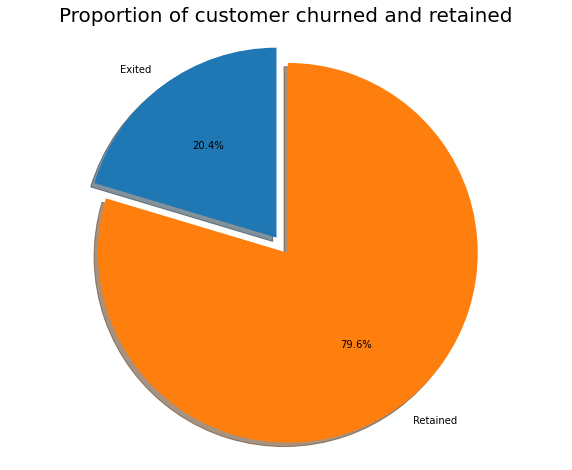

In [7]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

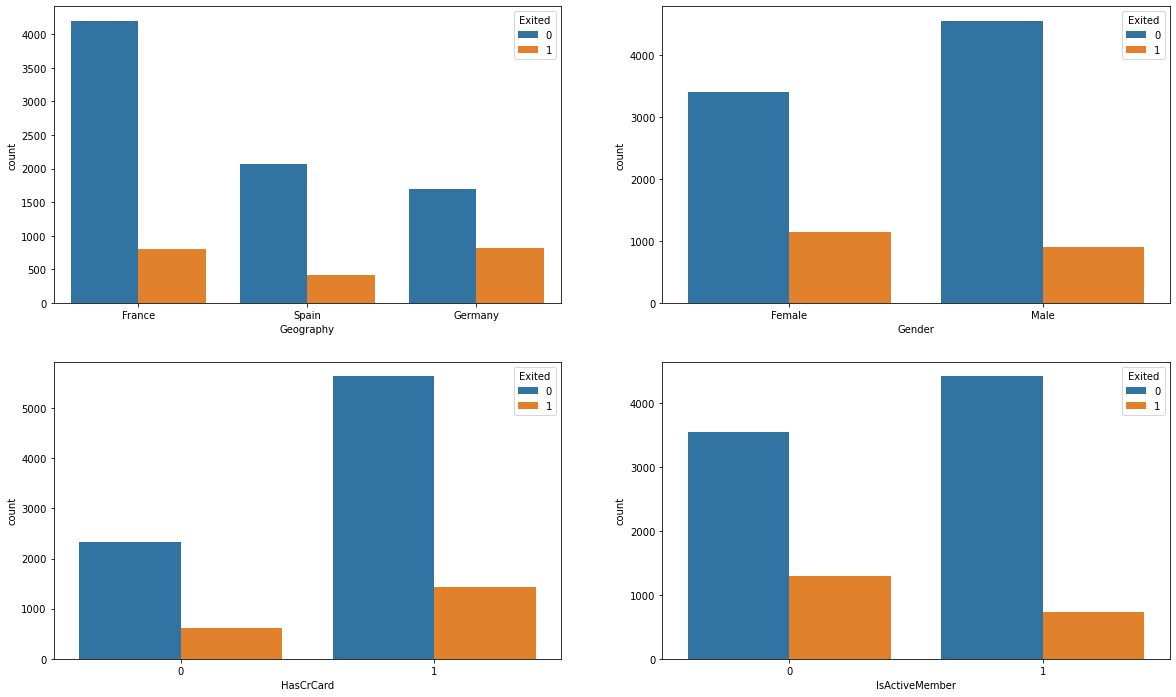

In [8]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

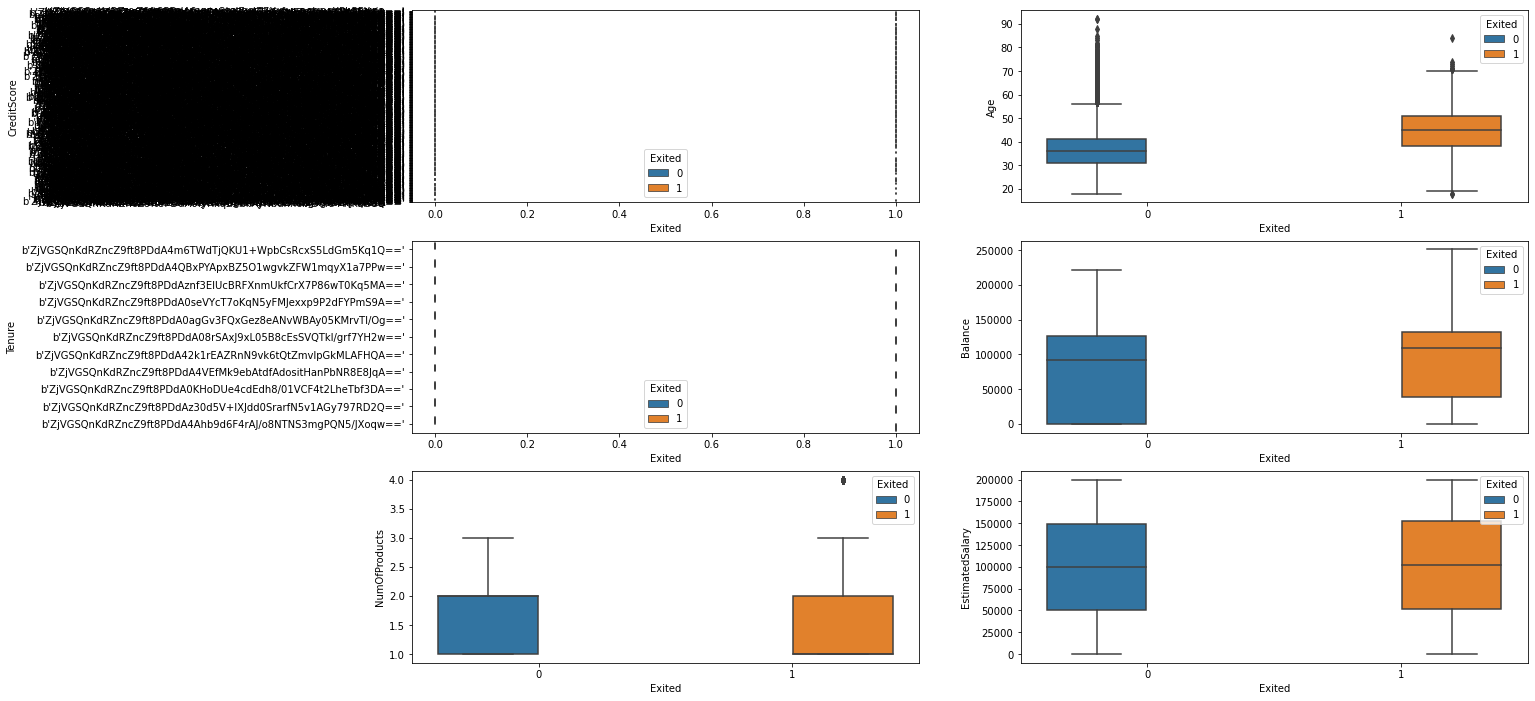

In [9]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

Feature engineering

In [10]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

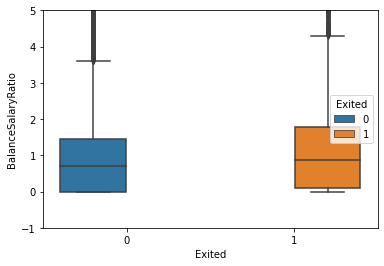

In [11]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

Data prep for model fitting

In [26]:
# df['CreditScoreDecrypt']
for i in df['CreditScore']:
    print(decrypt(i))

Error: Invalid base64-encoded string: number of data characters (9) cannot be 1 more than a multiple of 4

In [12]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,HasCrCard,IsActiveMember,Geography,Gender
8159,0,b'ZjVGSQnKdRZncZ9ft8PDdA0f1eGtNO2OwrJuD/0asyfZ...,25,b'ZjVGSQnKdRZncZ9ft8PDdA08rSAxJ9xL05B8cEsSVQTk...,0.00,2,15306.29,0.000000,1,1,Spain,Female
6332,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xntg2hd7wLT7XzfxeymLw...,35,b'ZjVGSQnKdRZncZ9ft8PDdA0agGv3FQxGez8eANvWBAy0...,90413.12,1,20555.21,4.398550,1,1,France,Female
8895,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xsDicq9SdXTUlF+HEA/8f...,40,b'ZjVGSQnKdRZncZ9ft8PDdAznf3ElUcBRFXnmUkfCrX7P...,122038.34,1,102085.35,1.195454,1,0,France,Female
5351,0,b'ZjVGSQnKdRZncZ9ft8PDdA0PoaG9EBbb1GQjfePhNkS9...,41,b'ZjVGSQnKdRZncZ9ft8PDdA4m6TWdTjQKU1+WpbCsRcxS...,124227.14,1,111184.67,1.117305,1,1,Germany,Male
4314,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xlnheXwvDyc5r2/kGCd7R...,34,b'ZjVGSQnKdRZncZ9ft8PDdA0KHoDUe4cdEdh8/01VCF4t...,133501.36,1,155643.04,0.857741,0,1,France,Male


In [13]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,HasCrCard,IsActiveMember,Geography,Gender
8159,0,b'ZjVGSQnKdRZncZ9ft8PDdA0f1eGtNO2OwrJuD/0asyfZ...,25,b'ZjVGSQnKdRZncZ9ft8PDdA08rSAxJ9xL05B8cEsSVQTk...,0.00,2,15306.29,0.000000,1,1,Spain,Female
6332,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xntg2hd7wLT7XzfxeymLw...,35,b'ZjVGSQnKdRZncZ9ft8PDdA0agGv3FQxGez8eANvWBAy0...,90413.12,1,20555.21,4.398550,1,1,France,Female
8895,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xsDicq9SdXTUlF+HEA/8f...,40,b'ZjVGSQnKdRZncZ9ft8PDdAznf3ElUcBRFXnmUkfCrX7P...,122038.34,1,102085.35,1.195454,1,-1,France,Female
5351,0,b'ZjVGSQnKdRZncZ9ft8PDdA0PoaG9EBbb1GQjfePhNkS9...,41,b'ZjVGSQnKdRZncZ9ft8PDdA4m6TWdTjQKU1+WpbCsRcxS...,124227.14,1,111184.67,1.117305,1,1,Germany,Male
4314,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xlnheXwvDyc5r2/kGCd7R...,34,b'ZjVGSQnKdRZncZ9ft8PDdA0KHoDUe4cdEdh8/01VCF4t...,133501.36,1,155643.04,0.857741,-1,1,France,Male


In [14]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

<ipython-input-14-2030c0db8e95>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-14-2030c0db8e95>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,b'ZjVGSQnKdRZncZ9ft8PDdA0f1eGtNO2OwrJuD/0asyfZ...,25,b'ZjVGSQnKdRZncZ9ft8PDdA08rSAxJ9xL05B8cEsSVQTk...,0.00,2,15306.29,0.000000,1,1,1,-1,-1,1,-1
6332,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xntg2hd7wLT7XzfxeymLw...,35,b'ZjVGSQnKdRZncZ9ft8PDdA0agGv3FQxGez8eANvWBAy0...,90413.12,1,20555.21,4.398550,1,1,-1,1,-1,1,-1
8895,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xsDicq9SdXTUlF+HEA/8f...,40,b'ZjVGSQnKdRZncZ9ft8PDdAznf3ElUcBRFXnmUkfCrX7P...,122038.34,1,102085.35,1.195454,1,-1,-1,1,-1,1,-1
5351,0,b'ZjVGSQnKdRZncZ9ft8PDdA0PoaG9EBbb1GQjfePhNkS9...,41,b'ZjVGSQnKdRZncZ9ft8PDdA4m6TWdTjQKU1+WpbCsRcxS...,124227.14,1,111184.67,1.117305,1,1,-1,-1,1,-1,1
4314,0,b'ZjVGSQnKdRZncZ9ft8PDdA0xlnheXwvDyc5r2/kGCd7R...,34,b'ZjVGSQnKdRZncZ9ft8PDdA0KHoDUe4cdEdh8/01VCF4t...,133501.36,1,155643.04,0.857741,-1,1,-1,1,-1,-1,1


In [23]:
for i in df_train[continuous_vars]:
    print(i)

CreditScore
Age
Tenure
Balance
NumOfProducts
EstimatedSalary
BalanceSalaryRatio


In [18]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'